In [1]:
from category_encoders import (
    GLMMEncoder,
    LeaveOneOutEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    TargetEncoder,
    WOEEncoder,
)

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

import numpy as np
import pandas as pd
import re
from typing import Optional, Tuple, Union

In [2]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer, LabelEncoder

In [3]:
from bluecast.blueprints.cast import BlueCast
from bluecast.blueprints.cast_cv import BlueCastCV
from bluecast.config.training_config import TrainingConfig, XgboostTuneParamsConfig
from bluecast.preprocessing.custom import CustomPreprocessing
from bluecast.general_utils.general_utils import save_to_production, load_for_production

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')
target = "Exited"
print('The dimension of the train dataset is:', train.shape)
print('The dimension of the test dataset is:', test.shape)

The dimension of the train dataset is: (20758, 18)
The dimension of the test dataset is: (13840, 17)


In [5]:
target = "NObeyesdad"

In [6]:
train[target].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

EDA with BlueCast

In [7]:
from bluecast.eda.analyse import (
    bi_variate_plots,
    correlation_heatmap,
    correlation_to_target,
    plot_pca,
    plot_theil_u_heatmap,
    plot_tsne,
    univariate_plots,
    check_unique_values,
    plot_null_percentage,
    mutual_info_to_target
)

from bluecast.preprocessing.feature_types import FeatureTypeDetector

Feature type detection

In [8]:
ignore_cols=[]
feat_type_detector=FeatureTypeDetector()
train_data=feat_type_detector.fit_transform_feature_types(train.drop(ignore_cols,axis=1))
len(feat_type_detector.num_columns)

2024-02-20 14:02:26.752454: Start detecting and casting feature types.


9

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

2024-02-20 14:13:13.775723: Start checking if GPU is available for usage.
Invalid Input: 'cuda', valid values are: {'approx', 'auto', 'exact', 'gpu_hist', 'hist'}
Xgboost uses CPU.
2024-02-20 14:13:13.922988: Start detecting and casting feature types.
2024-02-20 14:13:14.011928: Start fitting target label encoder.
2024-02-20 14:13:14.037940: Start encoding target labels.
2024-02-20 14:13:14.073938: Start executing train-test split with train size of 0.8.
2024-02-20 14:13:14.164927: Start filling infinite values.
2024-02-20 14:13:14.190959: Start filling infinite values.
2024-02-20 14:13:14.195939: Start date column conversion.
2024-02-20 14:13:14.196937: Start date column conversion.
2024-02-20 14:13:14.196937: Start fitting DataFrame schema.
2024-02-20 14:13:14.196937: Start checking if DataFrame schema of new data is consistent with previous data.
2024-02-20 14:13:14.200972: Start checking if DataFrame schema of new data is consistent with previous data.
2024-02-20 14:13:14.202936: S

Best trial: 14. Best value: -0.896659: 100%|██████████| 200/200 [26:17<00:00,  7.89s/it, 1577.32/3600 seconds]


Best params: {'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'tree_method': 'exact', 'num_class': 7, 'max_depth': 5, 'alpha': 4.297050944868444, 'lambda': 8.035333466596114, 'gamma': 1.8576254073397005, 'max_leaves': 0, 'subsample': 0.9344416740425617, 'colsample_bytree': 0.7838589262437281, 'colsample_bylevel': 0.8183556123605815, 'eta': 0.25065301561336906, 'steps': 806}
Finished hyperparameter tuning
Start final model training
Finished training


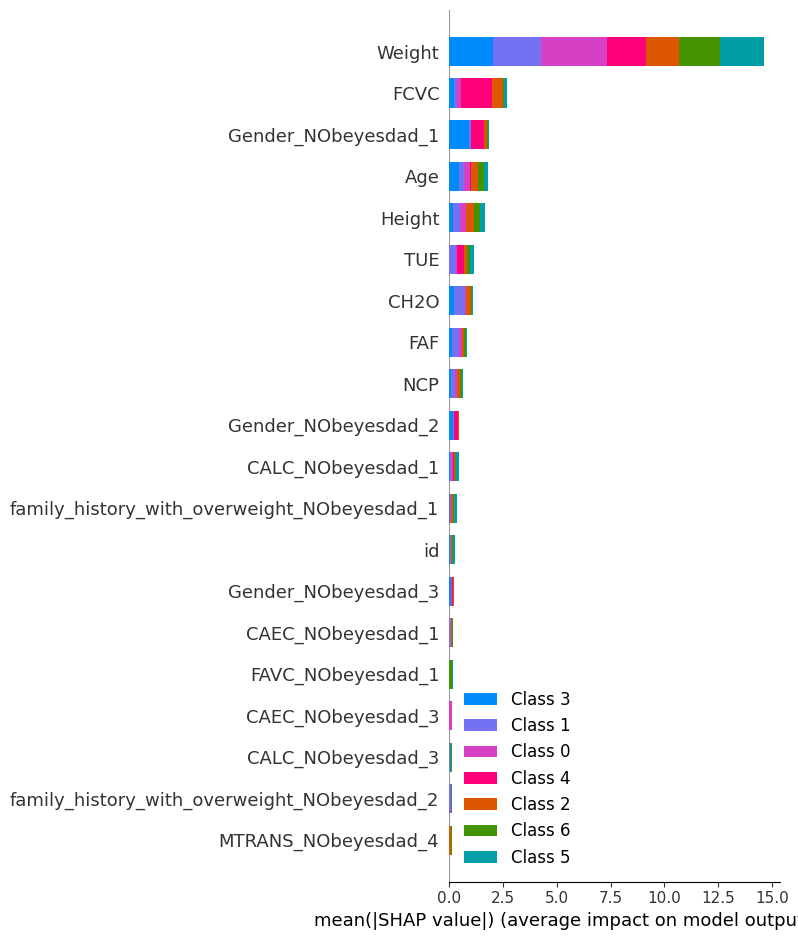

In [10]:
from bluecast.blueprints.cast import BlueCast
automl=BlueCast(
    class_problem='multiclass',
    target_column=target
)
automl.fit(train_data,target_col=target)

从上到下可以看出变量对model预测结果的影响程度

In [12]:
from bluecast.general_utils.general_utils import save_to_production
save_to_production(automl)

2024-02-20 14:55:19.115451: Start saving class instance.


In [19]:
many_unique_cols = check_unique_values(train_data, feat_type_detector.cat_columns,threshold=0)

Explanatory Analysis

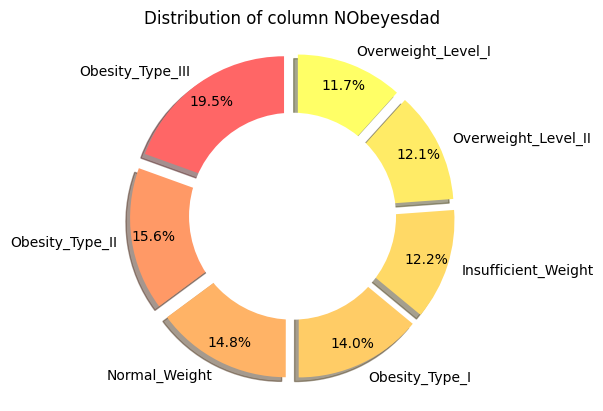

In [23]:
from bluecast.eda.analyse import (
    bi_variate_plots,
    univariate_plots,
    plot_count_pairs,
    correlation_heatmap,
    correlation_to_target,
    plot_pca,
    plot_pca_cumulative_variance,
    plot_theil_u_heatmap,
    plot_tsne,
    check_unique_values,
    plot_null_percentage,
    mutual_info_to_target,
    plot_pie_chart,
)
plot_pie_chart(
    train,
    target
)

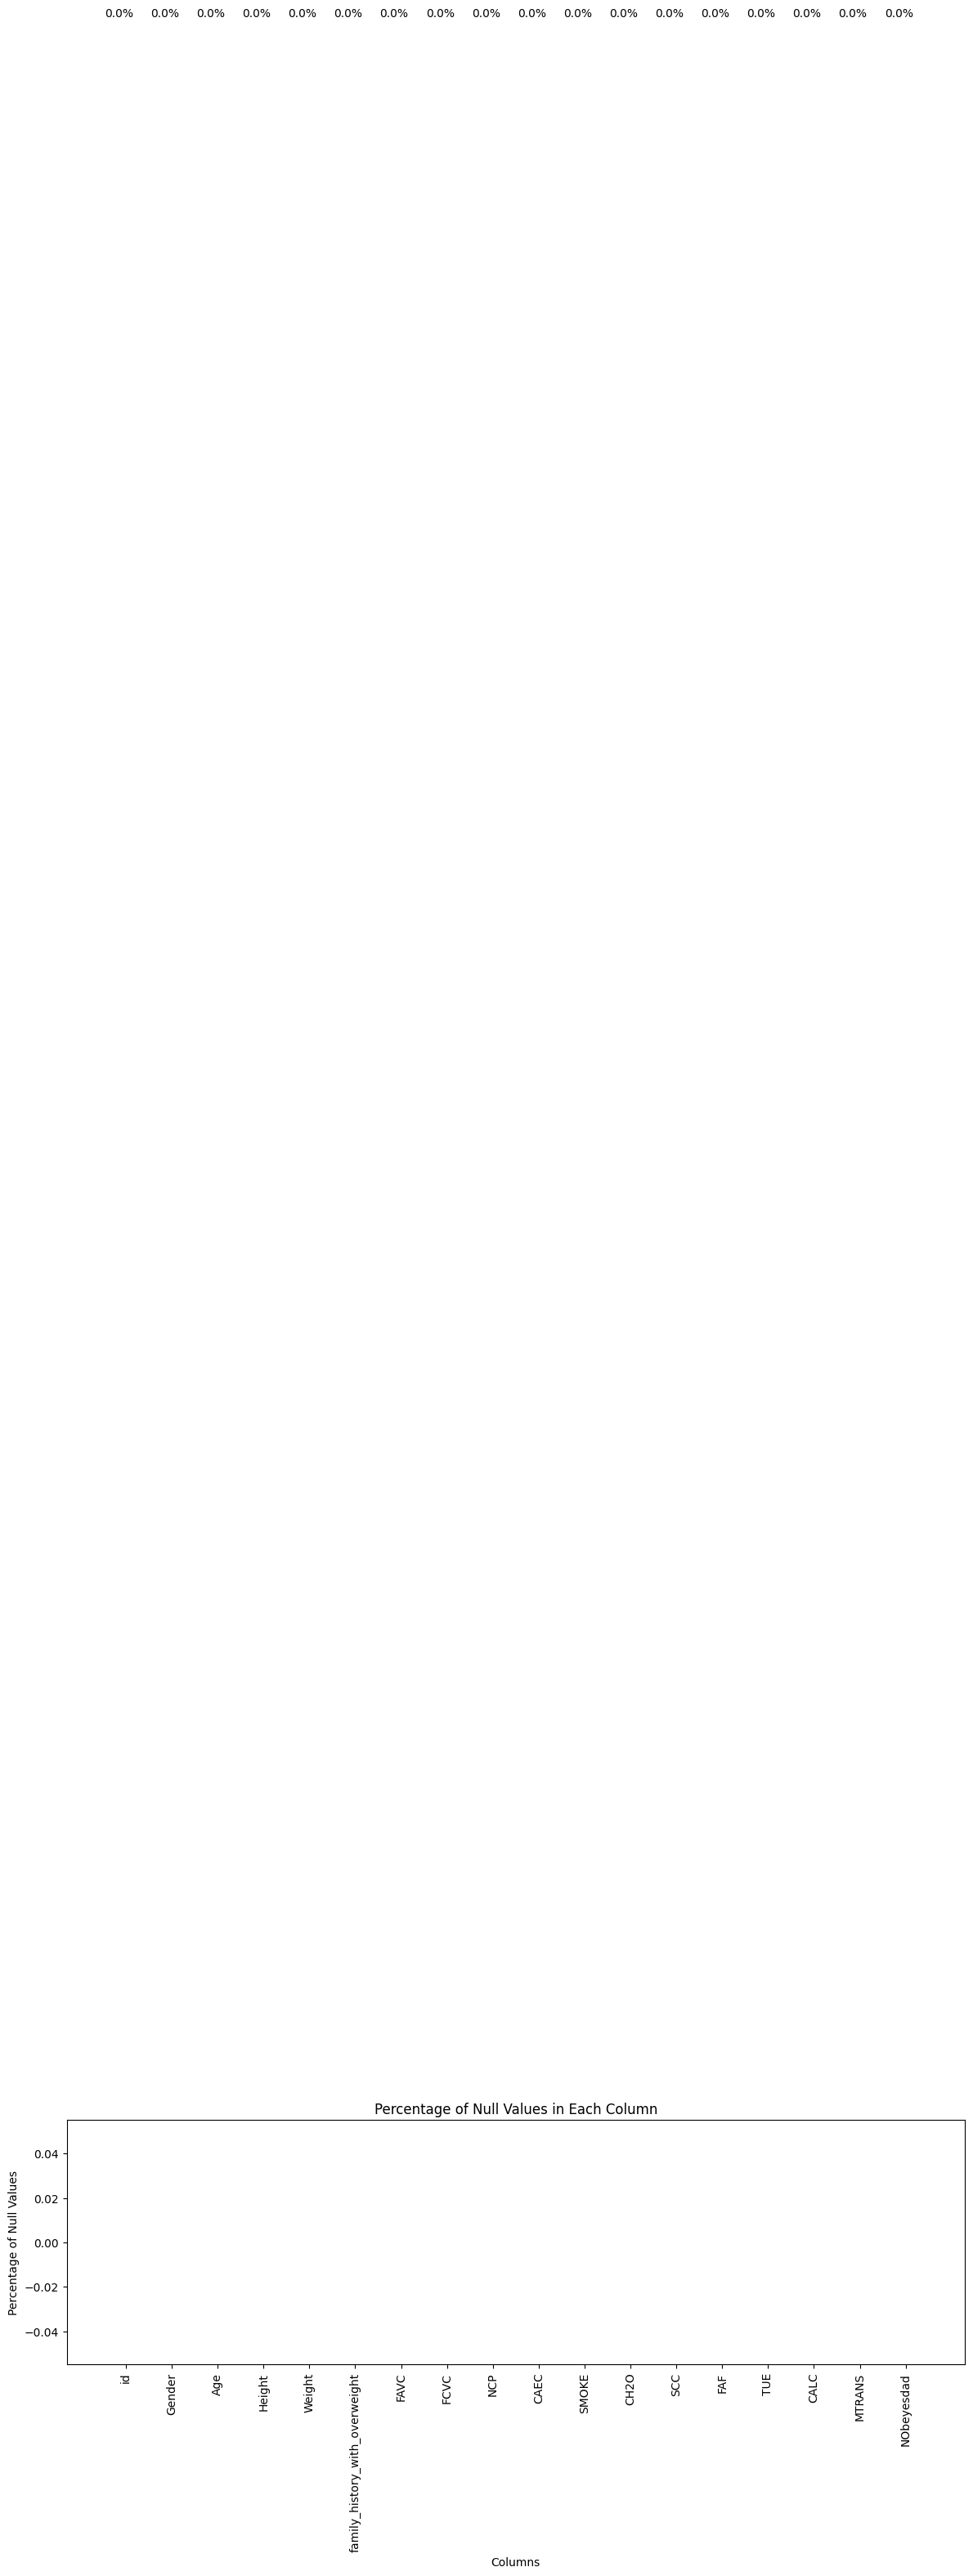

In [29]:
plot_null_percentage(
    train_data
)

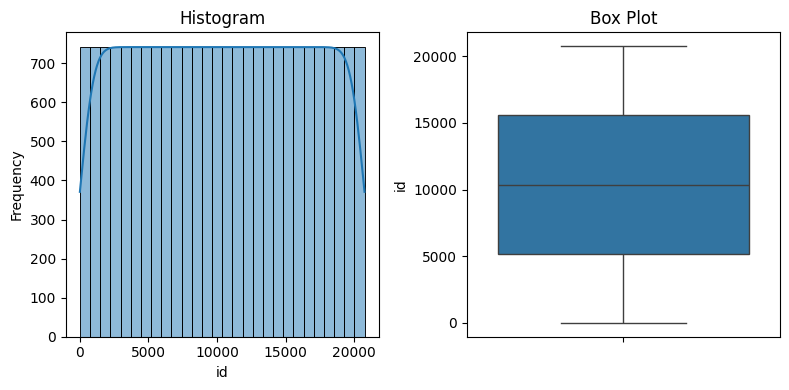

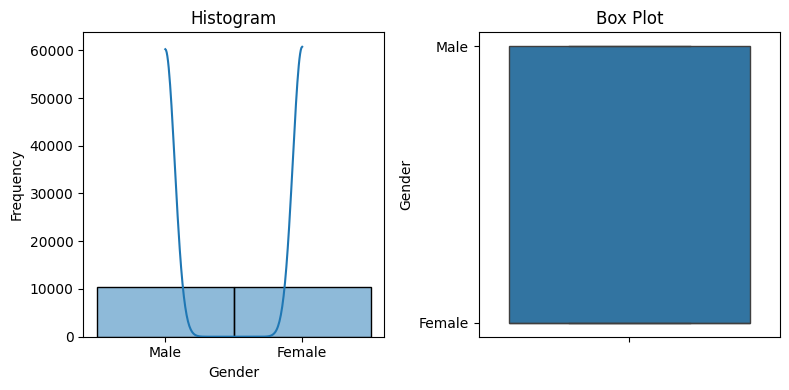

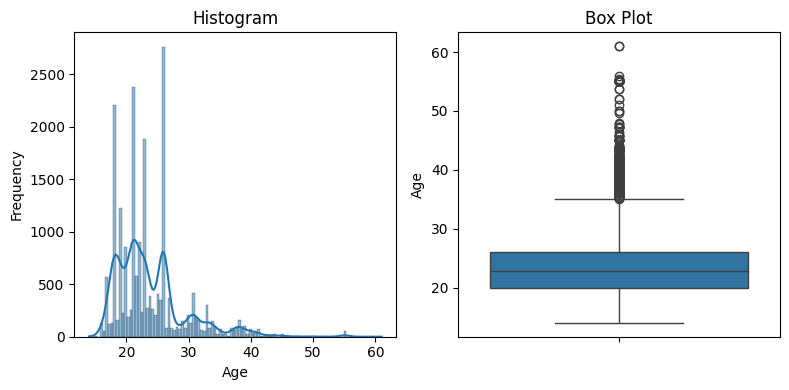

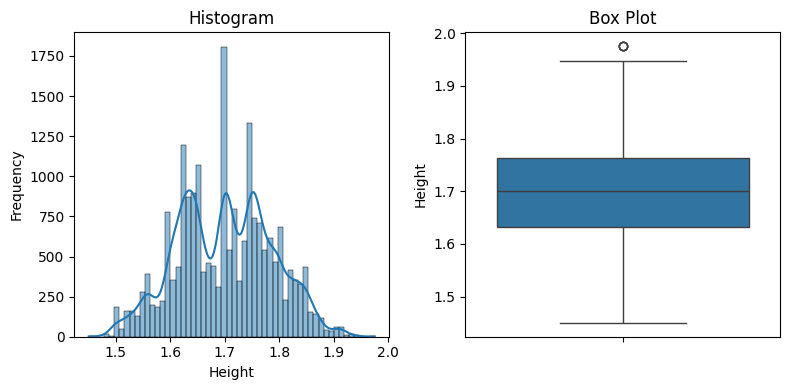

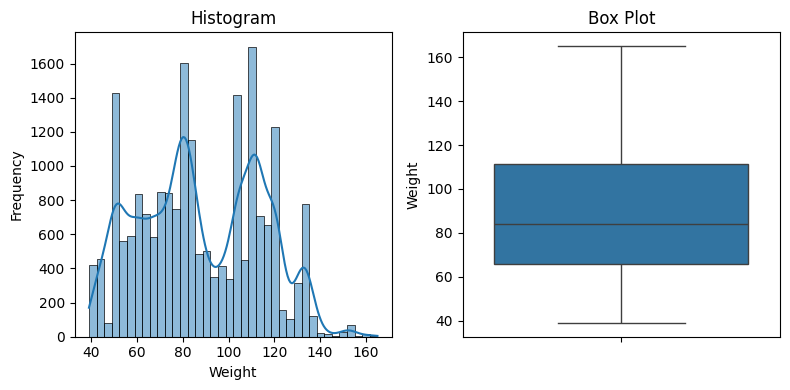

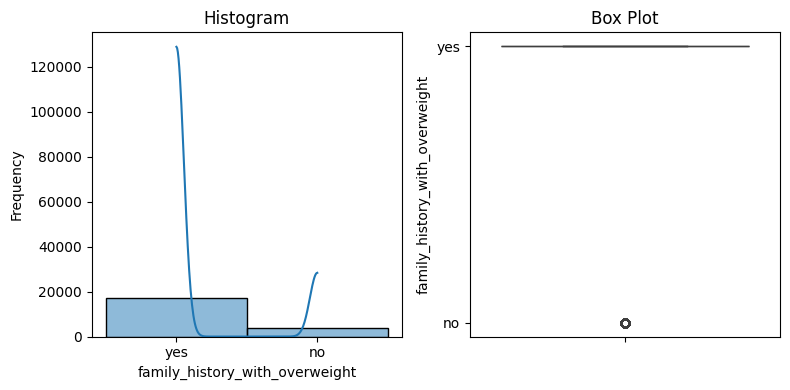

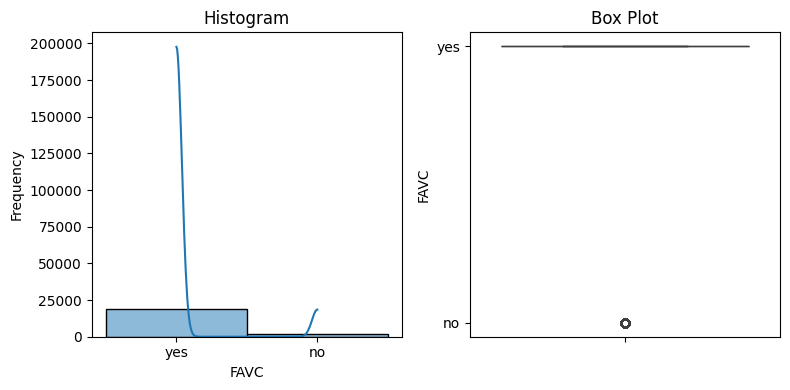

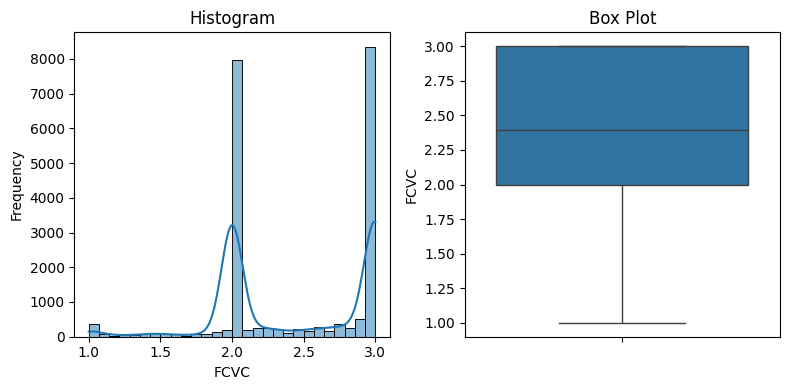

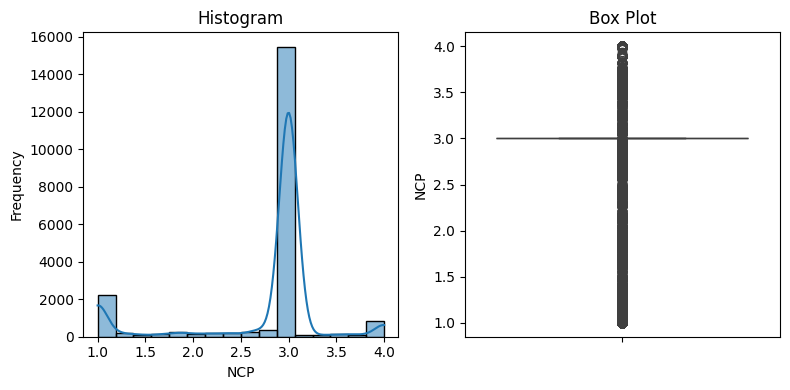

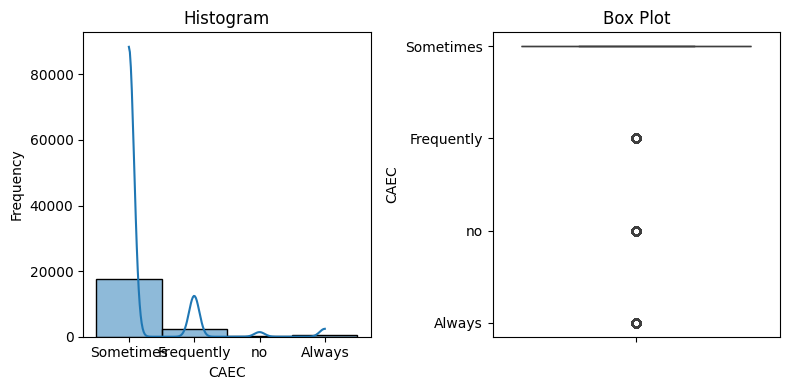

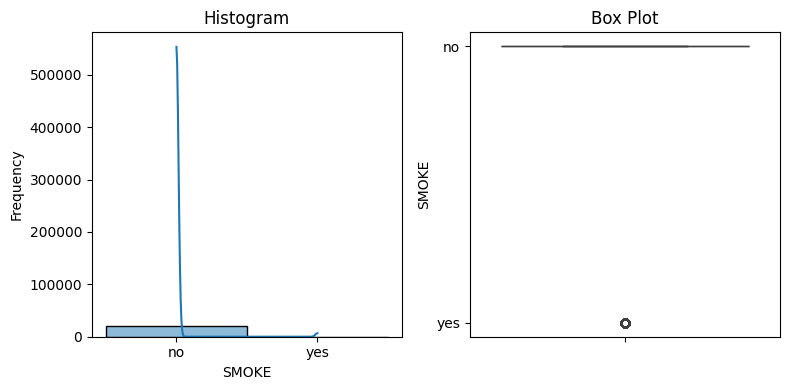

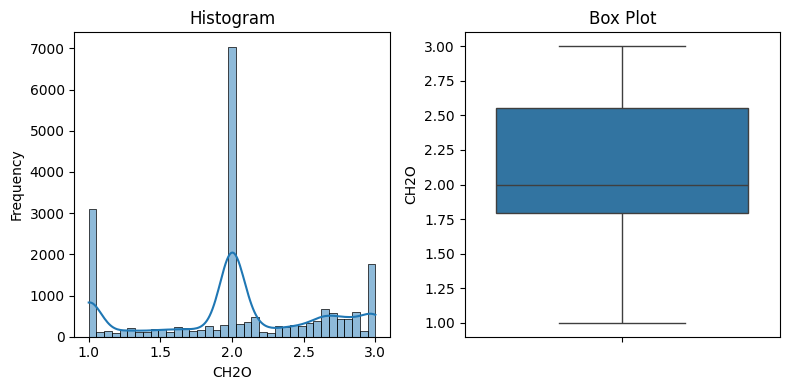

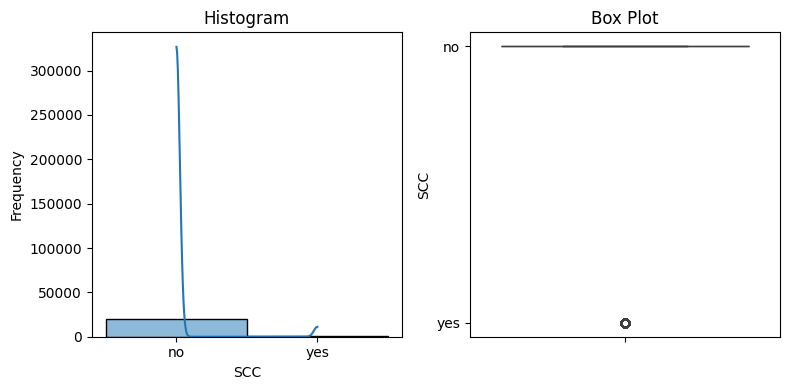

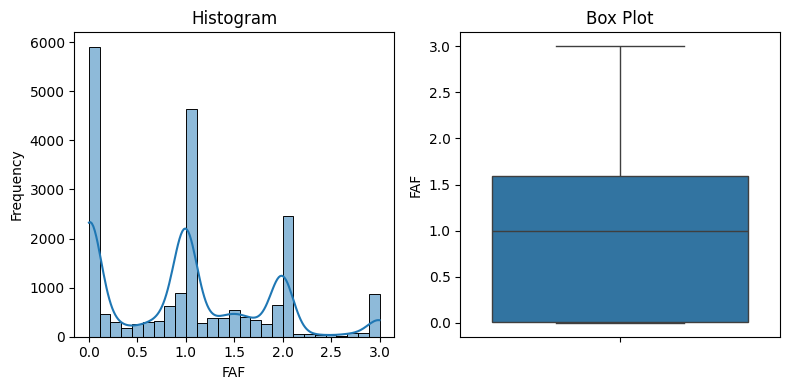

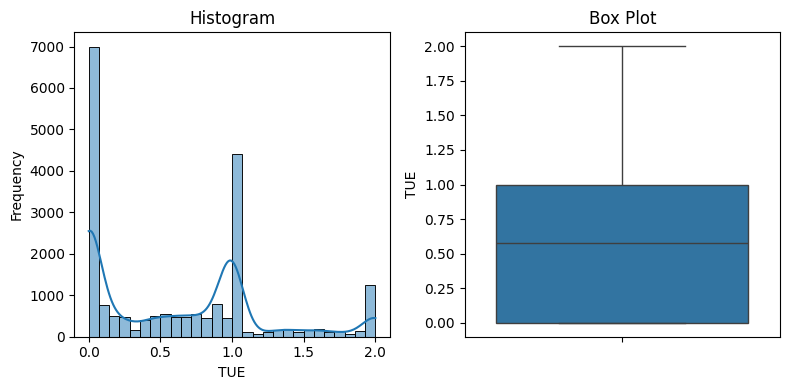

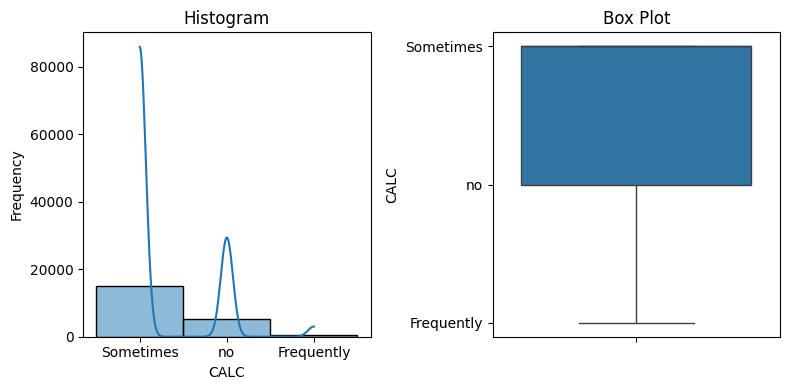

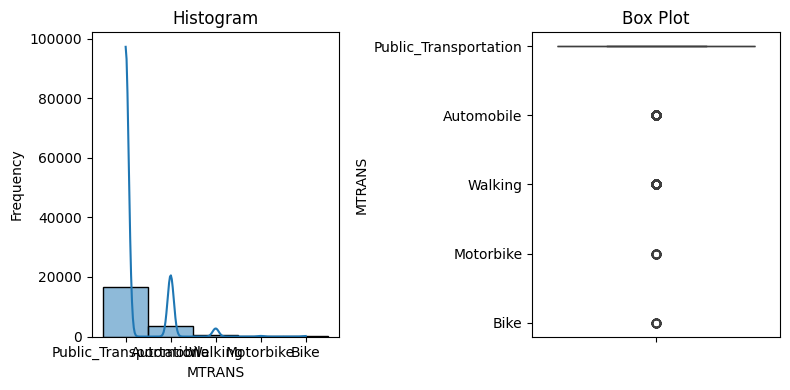

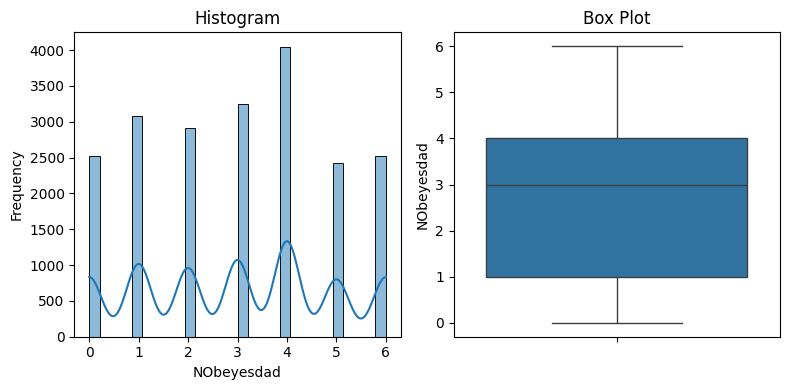

In [32]:
univariate_plots(train_data)

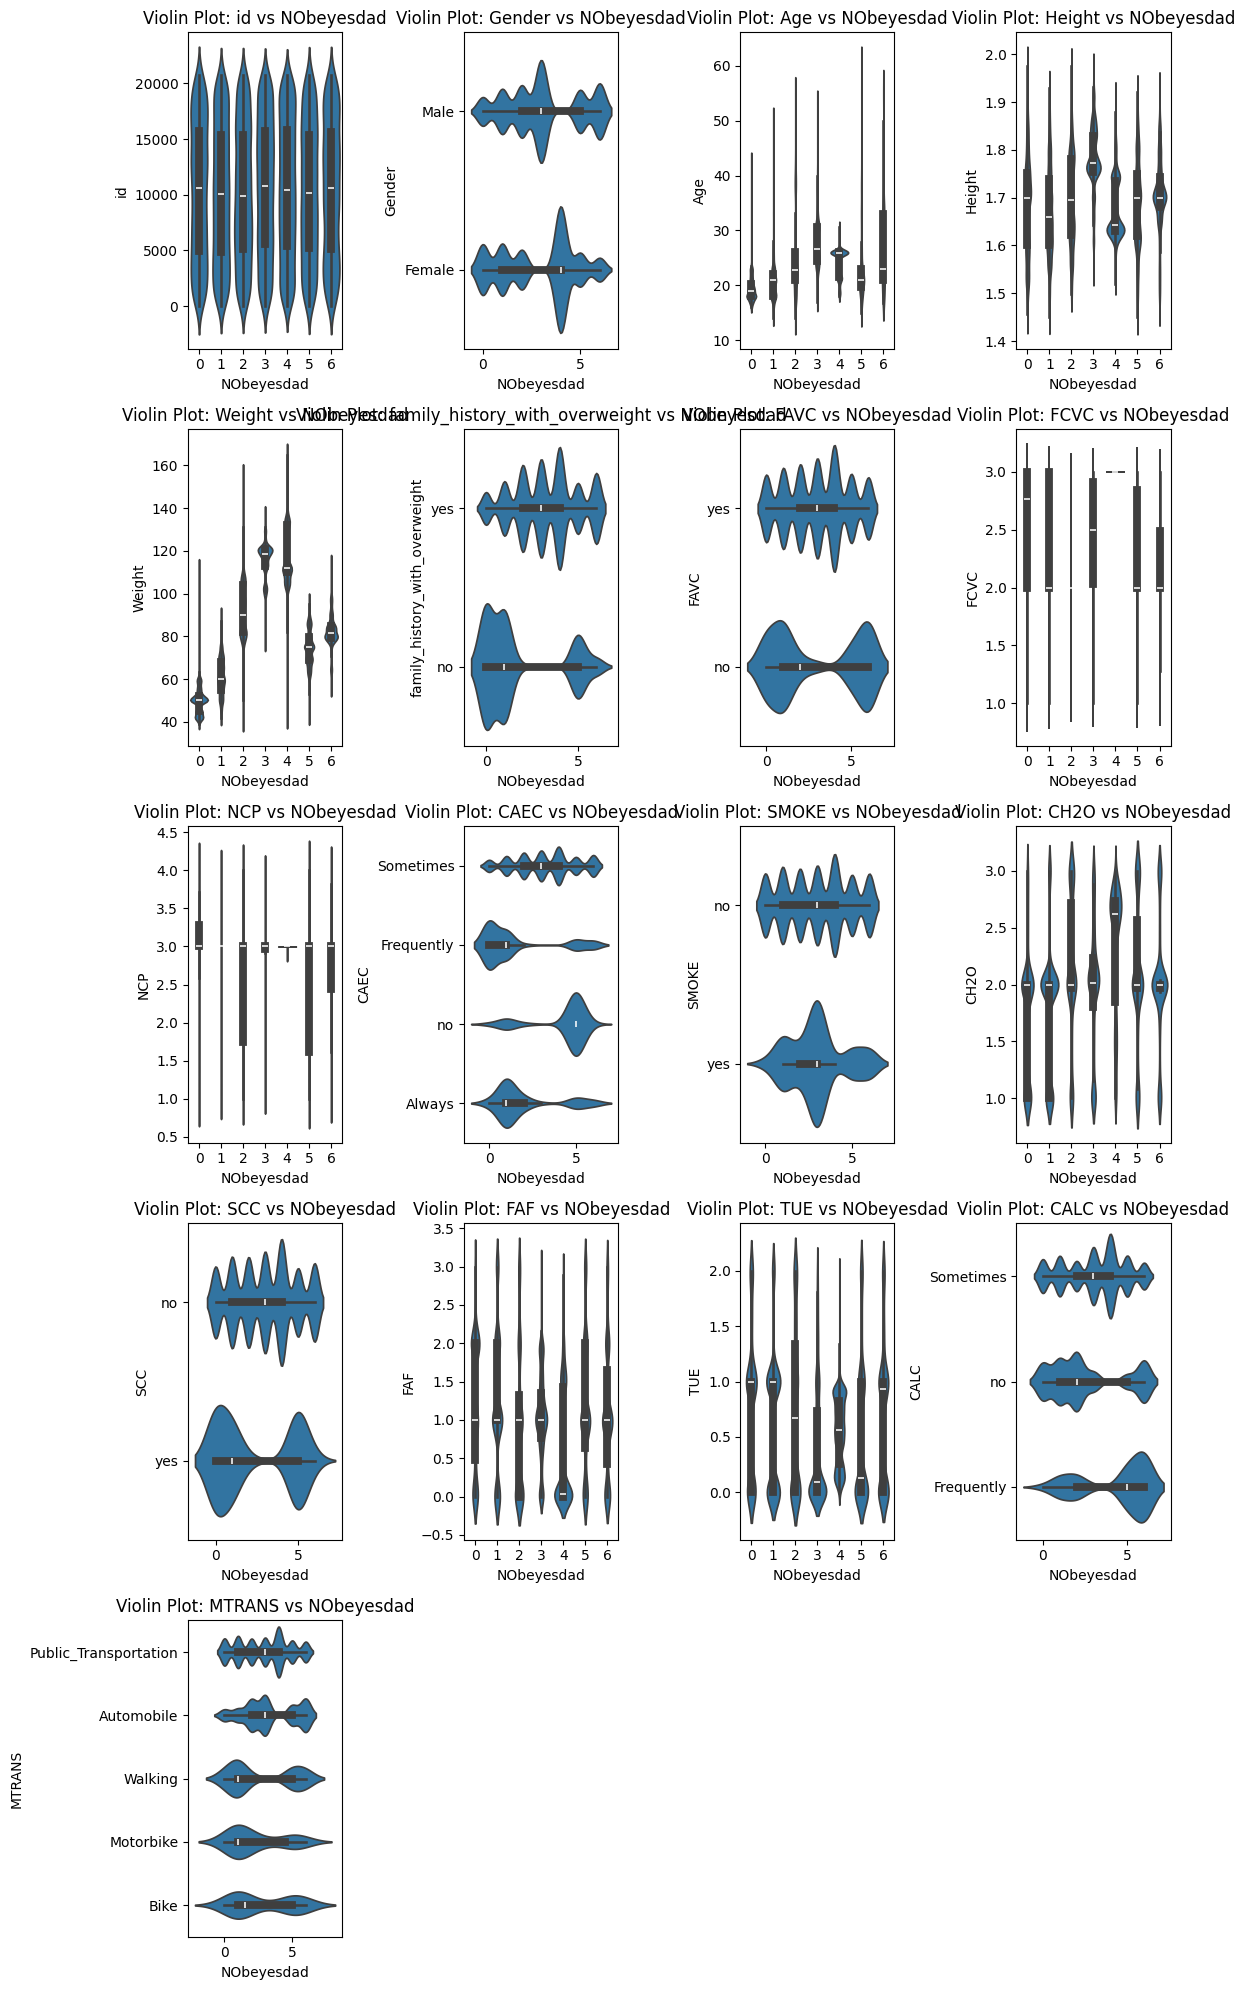

In [31]:
bi_variate_plots(
    train_data,
    target
)

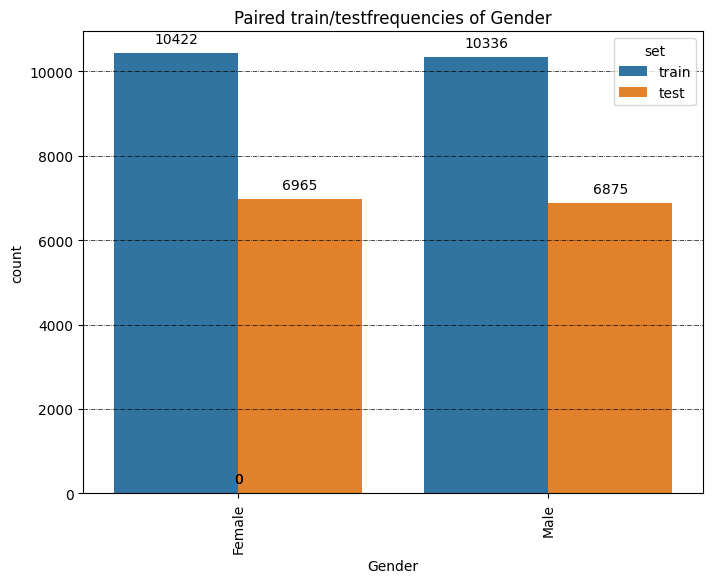

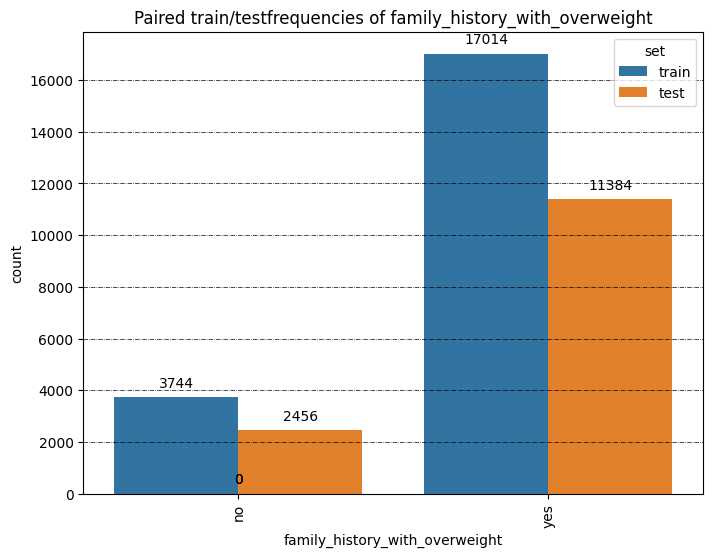

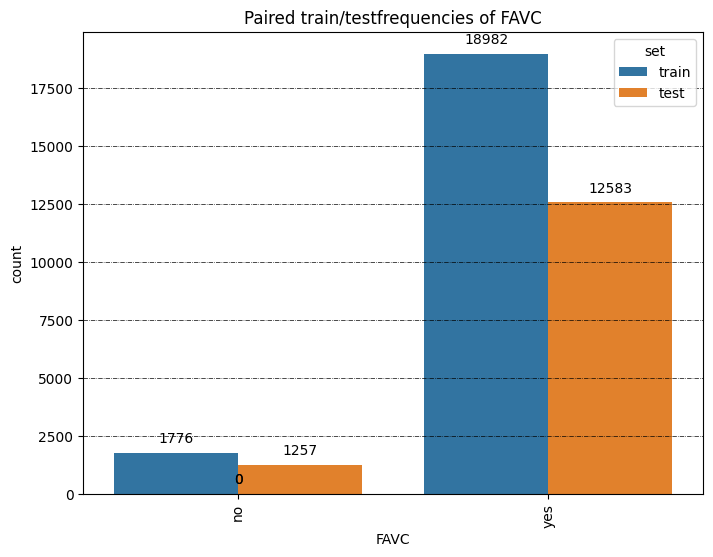

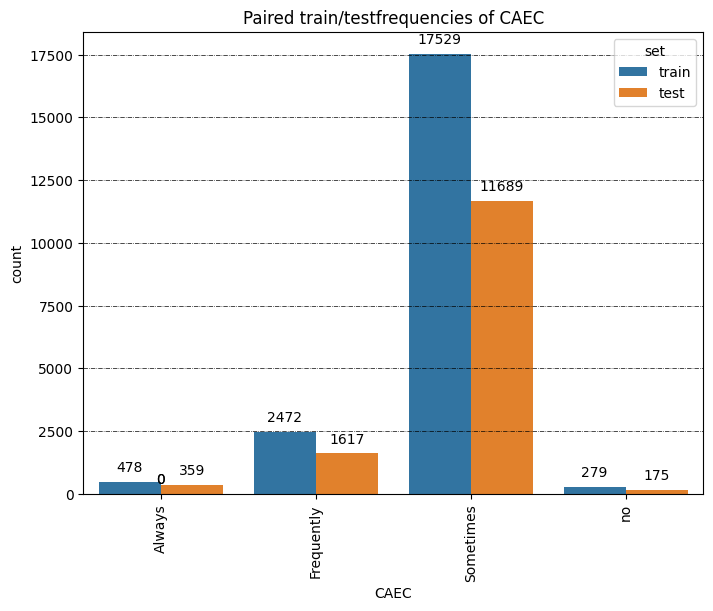

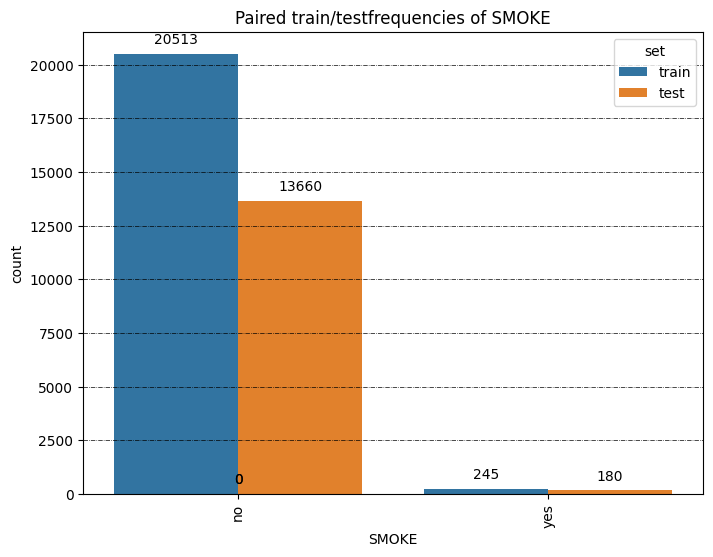

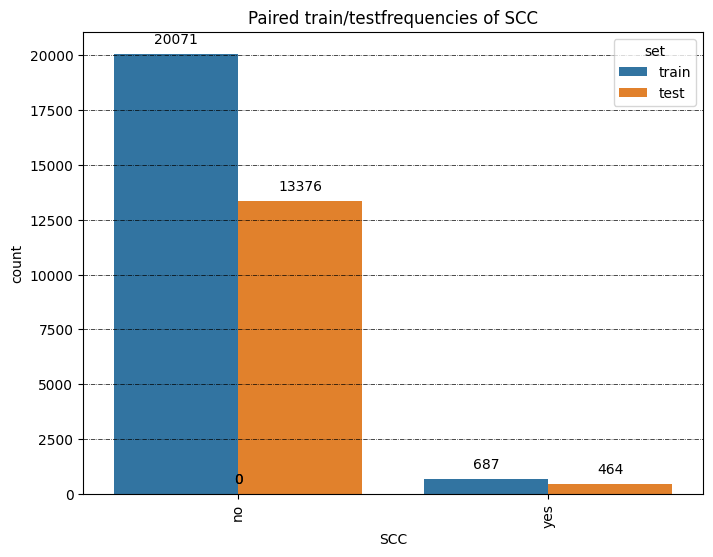

ValueError: cannot reindex on an axis with duplicate labels

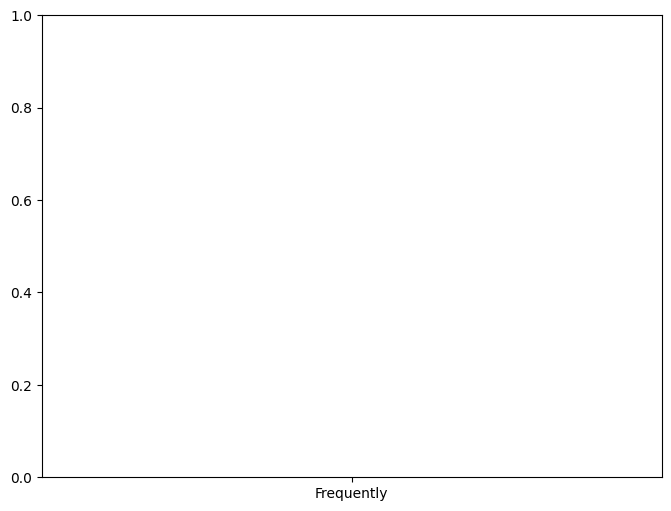

In [35]:
plot_count_pairs(
    train,test,cat_cols=train_data.loc[:,feat_type_detector.cat_columns]
)

In [47]:
feat_type_detector.num_columns.append(target)

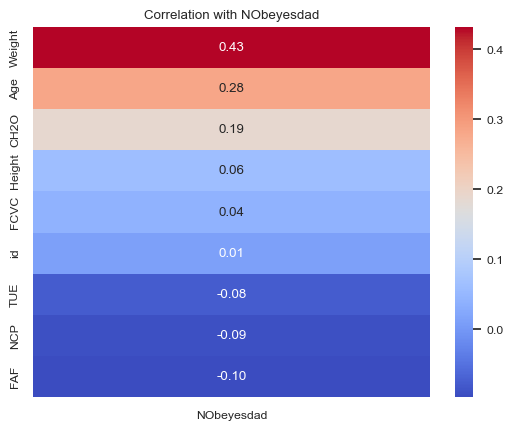

In [48]:
correlation_to_target(train_data.loc[:,feat_type_detector.num_columns],target)

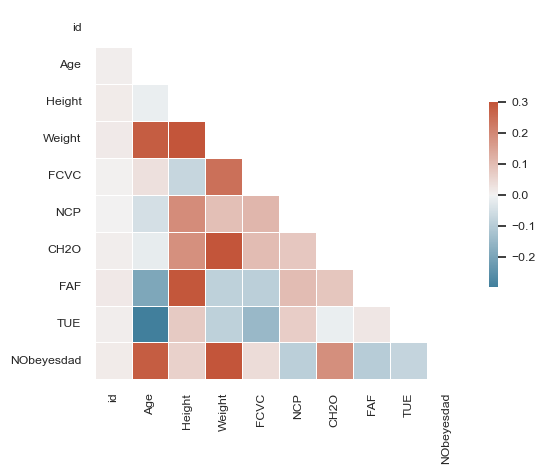

In [49]:
correlation_heatmap(train_data.loc[:,feat_type_detector.num_columns])

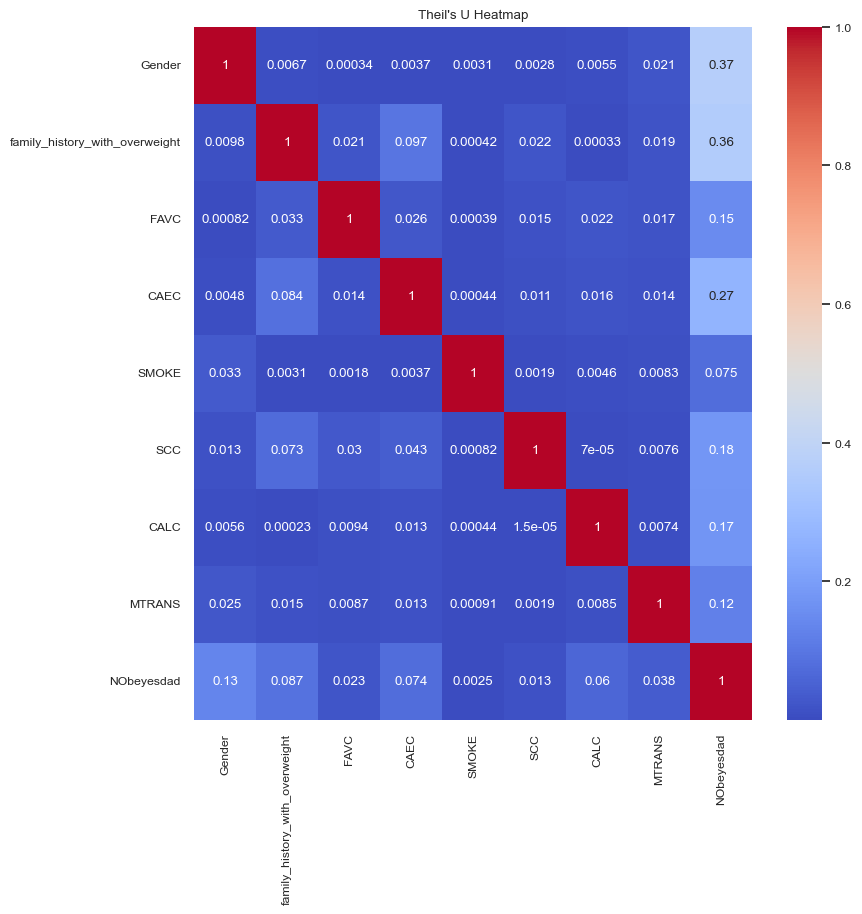

In [50]:
theil_matrix=plot_theil_u_heatmap(train_data,feat_type_detector.cat_columns)

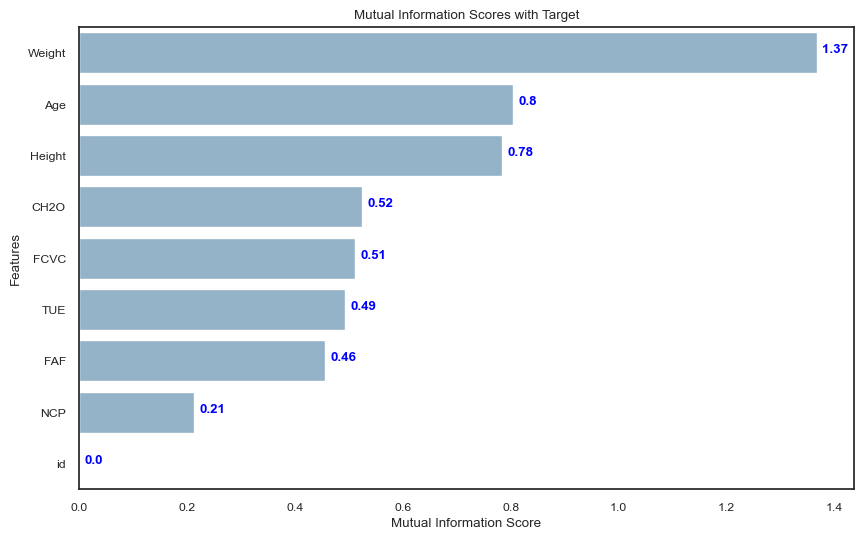

In [51]:
extra_params={'random_state':30}
mutual_info_to_target(train_data.loc[:,feat_type_detector.num_columns],target,class_problem='multiclass')

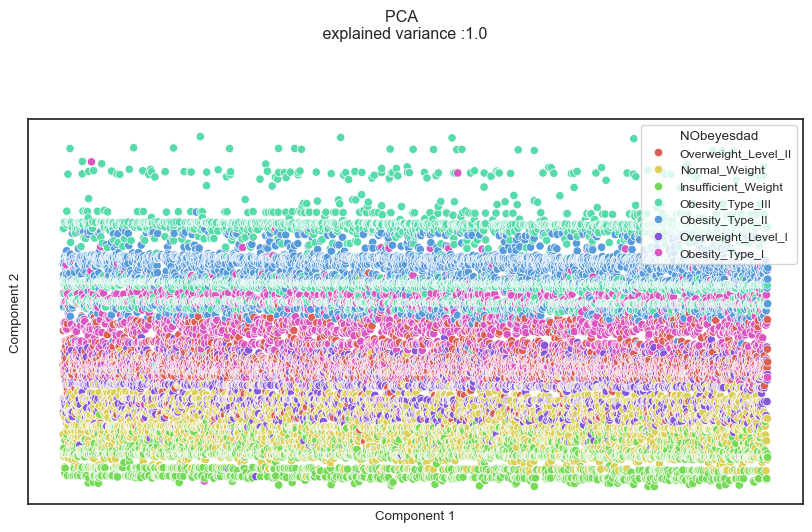

In [53]:
plot_pca(
    train.loc[:,feat_type_detector.num_columns],target
)

主成分分析是一组变量通过正交变换转变成另一组变量的分析方法，来实现数据降维的目的。转换后得到的这一组变量，即是我们所说的主成分。这种“天女散花”一般的PCA散点图，正说明了样本之间不具备明显的亚群分化

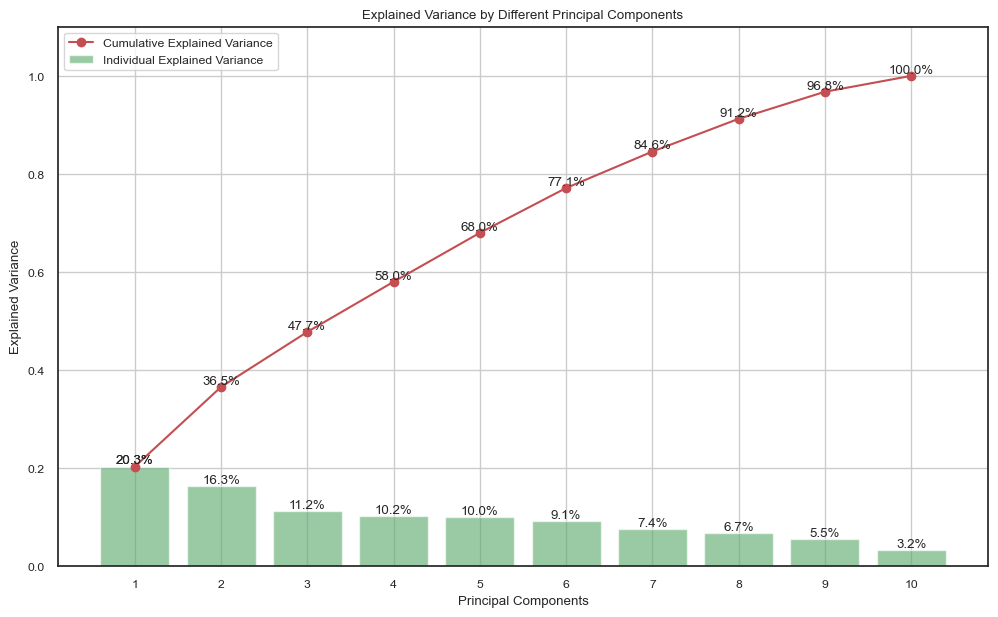

In [55]:
plot_pca_cumulative_variance(
    train_data.loc[:,feat_type_detector.num_columns],target
)

explained variance：表示因变量中方差由统计模型中的自变量解释的比例。换句话说，它告诉我们因变量的变化有多少可以归因于自变量。
累积解释方差指的是前几个主成分解释的总方差。从图中可以看出，前5个主成分解释了约68%的方差，前8个主成分解释了约91%的方差，前9个主成分解释了约97%的方差。这说明，前9个主成分已经能够解释大部分的数据方差。
数据中存在一个主要的模式，该模式可以由第一个主成分解释。
数据中存在一个次要模式，该模式可以由第二个主成分解释。
数据中存在一个第三重要的模式，该模式可以由第三个主成分解释。
如何根据这张图来解释样本之间的差异？
我们可以根据样本在PCA散点图中的分布来解释样本之间的差异。在PCA散点图中，如果两个样本的点距离较近，则说明这两个样本之间的差异较小；反之，如果两个样本的点距离较远，则说明这两个样本之间的差异较大。
例如，在图中，样本1和样本2的点距离较近，说明样本1和样本2之间的差异较小。而样本3和样本4的点距离较远，说明样本3和样本4之间的差异较大。

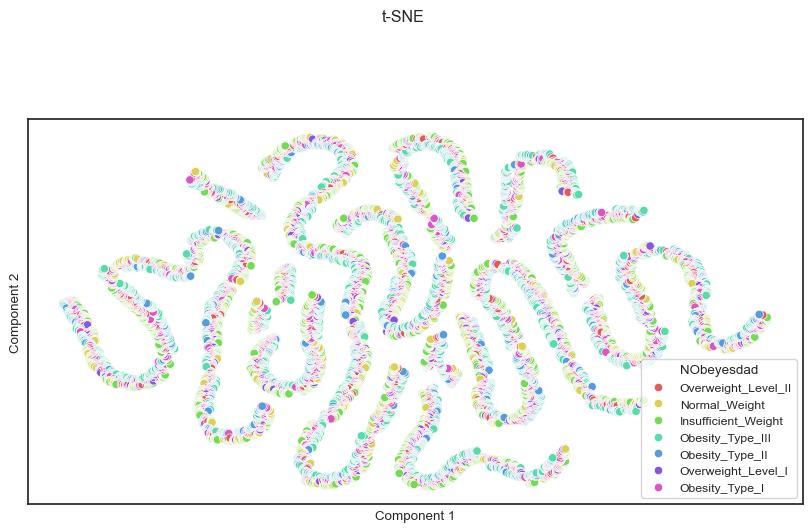

In [57]:
plot_tsne(
    train.loc[:,feat_type_detector.num_columns],target,
    perplexity=30,random_state=0
)

t-sne可以看作和pca相同的降维方法，不过在此图中变量并没有明显的分离

Leakage detection

In [58]:
from bluecast.eda.data_leakage_checks import (
    detect_categorical_leakage,detect_leakage_via_correlation
)

In [60]:
detect_leakage_via_correlation(
    train_data.loc[:,feat_type_detector.num_columns],target
)

No leakage has been detected


[]

In [61]:
detect_categorical_leakage(
    train_data.loc[:,feat_type_detector.num_columns],target
)

No leakage has been detected


[]